In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px

In [2]:
df_orders = pd.read_csv('orders.csv')
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
df_orders.shape

(3421083, 7)

In [13]:
df_orders['order_id'].nunique()

3421083

In [6]:
df_orders['user_id'].nunique()

206209

In [3]:
df_orders_prior = df_orders.loc[df_orders['eval_set']=='prior',:]
df_orders_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
df_orders_prior.shape

(3214874, 7)

In [38]:
df_orders_prior['user_id'].nunique()

206209

In [4]:
df_products = pd.read_csv('products.csv')
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
df_products.shape

(49688, 4)

In [5]:
df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
df_order_products_prior.shape

(32434489, 4)

In [14]:
df_order_products_prior['order_id'].nunique()

3214874

In [6]:
result_1 = pd.merge(df_order_products_prior, df_orders_prior, on=['order_id'])
result_1.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [7]:
result_1_drop = result_1.drop(['add_to_cart_order', 'eval_set', 'order_number', 'days_since_prior_order'], axis=1)
result_1_drop.head()

,order_id,product_id,reordered,user_id,order_dow,order_hour_of_day
0,2,33120,1,202279,5,9
1,2,28985,1,202279,5,9
2,2,9327,0,202279,5,9
3,2,45918,1,202279,5,9
4,2,30035,0,202279,5,9


In [8]:
result_2 = pd.merge(result_1_drop, df_products, on=['product_id'])
result_2.head()

,order_id,product_id,reordered,user_id,order_dow,order_hour_of_day,product_name,aisle_id,department_id
0,2,33120,1,202279,5,9,Organic Egg Whites,86,16
1,26,33120,0,153404,0,16,Organic Egg Whites,86,16
2,120,33120,0,23750,6,8,Organic Egg Whites,86,16
3,327,33120,1,58707,6,9,Organic Egg Whites,86,16
4,390,33120,1,166654,0,12,Organic Egg Whites,86,16


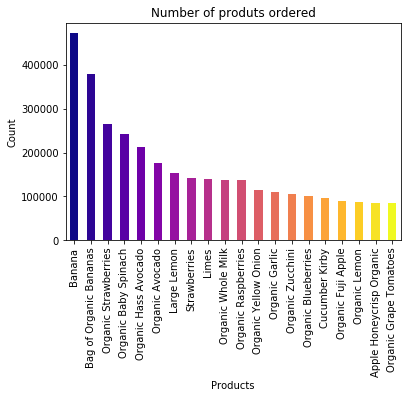

In [18]:
gradient = np.linspace(0, 1, 20)
color = plt.cm.plasma(gradient)

#fig = plt.figure(figsize=(10,5))

result_2['product_name'].value_counts()[:20].plot(kind='bar', color=color, title="Number of produts ordered").set\
                                        (xlabel="Products", ylabel="Count");

In [72]:
fig = go.Figure(
    data = go.Bar(x=result_2['product_name'].value_counts().head(20).index, 
             y=result_2['product_name'].value_counts().head(20).values, 
                  marker={'color': result_2['product_name'].value_counts().head(20).values,
            'colorscale': 'plasma'}, showlegend = False),
    layout = go.Layout(
        title = go.layout.Title(text = "Number of produts ordered", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Products')
    )
)

fig.show()

#B = result_2['product_name'].value_counts(ascending=True).head(20)

In [11]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
#Avec les department / aisles

fig = make_subplots(2,1, subplot_titles=('Products ordered more often',
                                        'Products ordered less often'))#,
                   #horizontal_spacing=0.15)

#fig = go.Figure(
#    data = go.Bar(x=A.index, 
#             y=A.values, marker={'color': A.values,
#            'colorscale': 'plasma'}, showlegend = False),
#    layout = go.Layout(
#        title = go.layout.Title(text = "Number of produts ordered", x = 0.5),
#        xaxis = go.layout.XAxis(title = 'Products')
#    )
#)


fig.add_trace(go.Bar(x=A.index, 
             y=A.values, marker={'color': A.values,
            'colorscale': 'plasma'}, showlegend = False)
              , row=1, col=1)
fig.add_trace(go.Bar(x=B.index, 
             y=B.values, marker={'color': B.values,
            'colorscale': 'plasma'}, showlegend = False)
              , row=2, col=1)

fig.layout.annotations[0].update(font= {'size': 9})
fig.layout.annotations[1].update(font= {'size': 9})
fig['layout']['xaxis']['title']='Products'
fig['layout']['xaxis2']['title']='Products'
fig['layout']['yaxis']['title']='Count'
fig['layout']['yaxis2']['title']='Count'

#fig.update_layout(height=400, width=600,
#                  title_text="Side By Side Subplots")

fig.show()

In [15]:
fig = go.Figure(
    data = go.Bar(x=result_2['order_dow'].value_counts().index, 
             y=result_2['order_dow'].value_counts().values, 
            marker={'color': result_2['order_dow'].value_counts().values,
            'colorscale': 'plasma'}, showlegend = False),
    layout = go.Layout(
        title = go.layout.Title(text = "Products bought in each day of the week", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Day of week')
    )
)


fig.show()

In [69]:
fig = make_subplots(2,1, subplot_titles=('Products bought in each day of the week',
                                        'Products bought in each hour of the day'))#,
                   #horizontal_spacing=0.15)

fig.add_trace(go.Bar(x=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 
             y=result_2['order_dow'].value_counts().values, 
            marker={'color': result_2['order_dow'].value_counts().values,
            'colorscale': 'plasma'}, showlegend = False),
              row=1, col=1)
fig.add_trace(go.Bar(x=result_2['order_hour_of_day'].value_counts().index, 
             y=D.values, marker={'color': result_2['order_hour_of_day'].value_counts().values,
            'colorscale': 'plasma'}, showlegend = False)
              , row=2, col=1)

fig.layout.annotations[0].update(font= {'size': 9})
fig.layout.annotations[1].update(font= {'size': 9})
fig['layout']['xaxis']['title']='Day of week'
fig['layout']['xaxis2']['title']='Hour of the day'
fig['layout']['yaxis']['title']='Count'
fig['layout']['yaxis2']['title']='Count'

#fig.update_layout(height=400, width=600,
#                  title_text="Side By Side Subplots")

fig.show()

In [60]:
day_of_week = [0, 1, 2, 3, 4, 5, 6]

fig = make_subplots(rows = 7, cols = 1, shared_xaxes = False, vertical_spacing = 0.03)

for i in range(len(day_of_week)):
    #order_dow = result_2.loc[result_2['order_dow']== day_of_week[i] ,:]
    #order_dow = order_dow['product_name'].value_counts().head(20)
    order_dow = result_2.loc[result_2['order_dow'] == day_of_week[i] ,'product_name'].value_counts().head(20)
    fig.add_trace(
        go.Bar(x = order_dow.index,
            y = order_dow.values, text= order_dow.index,
               textposition="inside", textangle=90,
        name = str(day_of_week[i])),
        row = i + 1,
        col = 1
    )

fig.update_layout(
    autosize=False, height=2000)
fig.update_xaxes(showticklabels=False)
fig.show()

In [66]:
day_of_week = [0, 1, 2, 3, 4, 5, 6]

fig = go.Figure()

for i in range(len(day_of_week)):
    if i == 0:
        fig.add_trace(
            go.Bar(
                x = result_2.loc[result_2['order_dow'] == day_of_week[i] ,'product_name'].value_counts().head(20).index,
                y = result_2.loc[result_2['order_dow'] == day_of_week[i] ,'product_name'].value_counts().head(20).values, 
                text=result_2.loc[result_2['order_dow'] == day_of_week[i] ,'product_name'].value_counts().head(20).index,
                textposition="inside", textangle=90,
                #nbinsx = dataset.loc[dataset['Year']==last_years[i], 'Date'].nunique(),
                visible=True))
    else:
        fig.add_trace(
            go.Bar(
                x = result_2.loc[result_2['order_dow'] == day_of_week[i] ,'product_name'].value_counts().head(20).index,
                y = result_2.loc[result_2['order_dow'] == day_of_week[i] ,'product_name'].value_counts().head(20).values, 
                text=result_2.loc[result_2['order_dow'] == day_of_week[i] ,'product_name'].value_counts().head(20).index,
                textposition="inside", textangle=90,
                #nbinsx = dataset.loc[dataset['Year']==last_years[i], 'Date'].nunique(),
                visible=False))


fig.update_layout(
        title = go.layout.Title(text = "Daily observations for one year", x = 0.5),
        showlegend = False)
fig.update_xaxes(showticklabels=False)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Saturday",
                        method = "update",
                        args = [{"visible" : [True, False, False, False, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Sunday",
                            method = "update",
                            args = [{"visible" : [False, True, False, False, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Monday",
                            method = "update",
                            args = [{"visible" : [False, False, True, False, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Tuesday",
                            method = "update",
                            args = [{"visible" : [False, False, False, True, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Wednesday",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Thursday",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Friday",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, False, False, True]}])
                ]
    )]
)

In [73]:
result_2

,order_id,product_id,reordered,user_id,order_dow,order_hour_of_day,product_name,aisle_id,department_id
0,2,33120,1,202279,5,9,Organic Egg Whites,86,16
1,26,33120,0,153404,0,16,Organic Egg Whites,86,16
2,120,33120,0,23750,6,8,Organic Egg Whites,86,16
3,327,33120,1,58707,6,9,Organic Egg Whites,86,16
4,390,33120,1,166654,0,12,Organic Egg Whites,86,16
...,...,...,...,...,...,...,...,...,...
32434484,3265099,43492,0,111311,3,10,Gourmet Burger Seasoning,104,13
32434485,3361945,43492,0,142932,3,10,Gourmet Burger Seasoning,104,13
32434486,3267201,33097,0,183867,3,18,Piquillo & Jalapeno Bruschetta,81,15
32434487,3393151,38977,0,79056,4,13,Original Jerky,100,21


In [75]:
df_aisles = pd.read_csv('aisles.csv')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [77]:
df_department = pd.read_csv('departments.csv')
df_department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [76]:
result_3 = pd.merge(result_2, df_aisles, on=['aisle_id'])
result_3.head()

,order_id,product_id,reordered,user_id,order_dow,order_hour_of_day,product_name,aisle_id,department_id,aisle
0,2,33120,1,202279,5,9,Organic Egg Whites,86,16,eggs
1,26,33120,0,153404,0,16,Organic Egg Whites,86,16,eggs
2,120,33120,0,23750,6,8,Organic Egg Whites,86,16,eggs
3,327,33120,1,58707,6,9,Organic Egg Whites,86,16,eggs
4,390,33120,1,166654,0,12,Organic Egg Whites,86,16,eggs


In [78]:
result_4 = pd.merge(result_3, df_department, on=['department_id'])
result_5 = result_4.drop(['aisle_id', 'department_id'], axis=1)

In [101]:
result_5.loc[result_5['order_dow'] == 0 ,['product_name', 'aisle']].value_counts().head(20)

product_name              aisle                     
Banana                    fresh fruits                  96769
Bag of Organic Bananas    fresh fruits                  71493
Organic Baby Spinach      packaged vegetables fruits    54914
Organic Strawberries      fresh fruits                  53831
Organic Hass Avocado      fresh fruits                  43944
Organic Avocado           fresh fruits                  39846
Large Lemon               fresh fruits                  33605
Limes                     fresh fruits                  30266
Strawberries              fresh fruits                  27486
Organic Raspberries       packaged vegetables fruits    26378
Organic Whole Milk        milk                          26177
Organic Yellow Onion      fresh vegetables              26011
Organic Garlic            fresh vegetables              24845
Organic Zucchini          fresh vegetables              23864
Cucumber Kirby            fresh vegetables              22054
Organic Grape Tom

In [98]:
index_product = [a_tuple[0] for a_tuple in result_5.loc[result_5['order_dow'] == 0 ,['product_name', 'aisle']].value_counts().head(20).index]
index_product

['Banana',
 'Bag of Organic Bananas',
 'Organic Baby Spinach',
 'Organic Strawberries',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Limes',
 'Strawberries',
 'Organic Raspberries',
 'Organic Whole Milk',
 'Organic Yellow Onion',
 'Organic Garlic',
 'Organic Zucchini',
 'Cucumber Kirby',
 'Organic Grape Tomatoes',
 'Organic Blueberries',
 'Organic Lemon',
 'Yellow Onions',
 'Apple Honeycrisp Organic']

In [99]:
index_aisle = [a_tuple[1] for a_tuple in result_5.loc[result_5['order_dow'] == 0 ,['product_name', 'aisle']].value_counts().head(20).index]
index_aisle

['fresh fruits',
 'fresh fruits',
 'packaged vegetables fruits',
 'fresh fruits',
 'fresh fruits',
 'fresh fruits',
 'fresh fruits',
 'fresh fruits',
 'fresh fruits',
 'packaged vegetables fruits',
 'milk',
 'fresh vegetables',
 'fresh vegetables',
 'fresh vegetables',
 'fresh vegetables',
 'packaged vegetables fruits',
 'packaged vegetables fruits',
 'fresh fruits',
 'fresh vegetables',
 'fresh fruits']

In [104]:
fig = px.scatter(x = [a_tuple[0] for a_tuple in result_5.loc[:,['product_name', 'aisle']].value_counts().head(20).index], 
              #x-values column
              y = result_5.loc[:,['product_name', 'aisle']].value_counts().head(20).values,
              #y-values column
              color = [a_tuple[1] for a_tuple in result_5.loc[:,['product_name', 'aisle']].value_counts().head(20).index]
              #column shown by color
              #line_group = ”country”, #group rows of a column
              #hover_name = ”country”  #hover info title
              )

fig.show()

In [117]:
fig = go.Figure(
    data = go.Bar(x=[a_tuple[0] for a_tuple in result_5.loc[:,['product_name', 'aisle']].value_counts().head(20).index], 
             y=result_5.loc[:,['product_name', 'aisle']].value_counts().head(20).values, 
                  hovertext = [a_tuple[1] for a_tuple in result_5.loc[:,['product_name', 'aisle']].value_counts().head(20).index]), # showlegend = False
    layout = go.Layout(
        title = go.layout.Title(text = "Top of produts ordered on Saturday", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Products')
    )
)

fig.show()

In [118]:
fig = go.Figure(
    data = go.Bar(x=result_5['department'].value_counts().head(20).index, 
             y=result_5['department'].value_counts().head(20).values, 
                  marker={'color': result_5['department'].value_counts().head(20).values,
            'colorscale': 'plasma'}, showlegend = False),
    layout = go.Layout(
        title = go.layout.Title(text = "Number of produts ordered by department", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Department')
    )
)

fig.show()

In [119]:
fig = go.Figure(
    data = go.Bar(x=result_5['aisle'].value_counts().head(20).index, 
             y=result_5['aisle'].value_counts().head(20).values, 
                  marker={'color': result_5['aisle'].value_counts().head(20).values,
            'colorscale': 'plasma'}, showlegend = False),
    layout = go.Layout(
        title = go.layout.Title(text = "Number of produts ordered by aisle", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Aisle')
    )
)

fig.show()